In [1]:
import numpy as np
import pandas as pd

In [24]:
admission_data = pd.read_csv("Admission_Predict.csv")
admission_data.columns =["Serial_no","Gre_Score","Toefl_score","University_Rating","SOP","LOR","CGPA","Research","Chance_of_Admit"] 

In [25]:
admission_data.tail()

,Serial_no,Gre_Score,Toefl_score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
194,195,316,109,3,3.5,3.0,8.76,0,0.77
195,196,307,107,2,3.0,3.5,8.52,1,0.78
196,197,306,105,2,3.0,2.5,8.26,0,0.73
197,198,310,106,2,3.5,2.5,8.33,0,0.73
198,199,311,104,3,4.5,4.5,8.43,0,0.70


In [26]:
xsg = admission_data["Gre_Score"].tolist()
ysg = admission_data["Chance_of_Admit"].tolist()


print(len(xsg))
print(len(ysg))

199
199


In [27]:
import matplotlib.pyplot as plt

def show_scatter_plot(title, x_label, y_label, x_values, y_values):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.show()

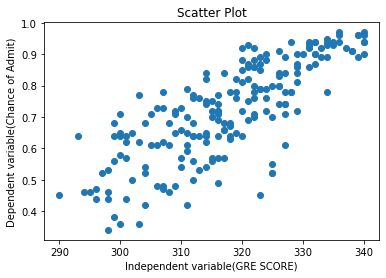

In [28]:
show_scatter_plot('Scatter Plot', 'Dependent variable(Chance of Admit)', 
                  'Independent variable(GRE SCORE)', xsg, ysg )

<h3>Linear Regression Line </h3>

In [29]:
import numpy as np

def calculate_slope_intercept(x_values, y_values):
    """
    Calculate the slope and intercept of a regression line.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the slope and y-intercept of the line.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [30]:
import matplotlib.pyplot as plt

def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(xsg, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(x_label)
    plt.xlabel(y_label)

    plt.show()

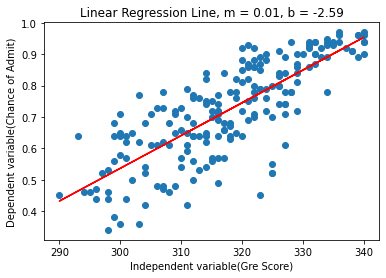

In [31]:
show_least_squares_line('Linear Regression Line', 'Dependent variable(Chance of Admit)', 
                  'Independent variable(Gre Score)', xsg, ysg )

<h3>Calculating Coefficient of determination </h3>

In [32]:
import numpy as np

def calculate_ss(x_values, y_values):
    """
    Calculate the residual and total sums of squares.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the residual and total sums of squares.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    ss_residual = sum_yy - b*sum_y - m*sum_xy
    ss_total    = sum_yy - (sum_y*sum_y)/n
    
    return ss_residual, ss_total




In [33]:
def calculate_r2(ss_residual, ss_total):
    """
    Calculate the coefficient of determination.
    @param ss_residual the residual sum of squares.
    @param ss_total the total sum of squares.
    @return the coefficient of determination.
    """
    cofd = 1 - ss_residual/ss_total
    return cofd


In [34]:
ss_residual, ss_total = calculate_ss(xsg, ysg)

print(f'ss_residual = {ss_residual:8.5f}')
print(f'ss_total    = {ss_total:8.5f}')

ss_residual =  1.83339
ss_total    =  4.85188


In [35]:
r2 = calculate_r2(ss_residual, ss_total)

print(f'coefficient of determination = {r2:.3f}')

coefficient of determination = 0.622


<h3>Calculating Correlation Coefficient</h3>

In [36]:
import math
import numpy as np

def calculate_r(x_values, y_values):
    """
    Calculate the correlation coefficient.
    @param x_values the x values.
    @param y_values the y values.
    @return the correlation coefficient.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = math.sqrt(sum_xx - (sum_x*sum_x)/n)*math.sqrt(sum_yy - (sum_y*sum_y)/n)
    
    r = numerator/denominator
    return r

In [37]:
r = calculate_r(xsg, ysg)

print(f'r = {r:.3f}')
print("")

r = 0.789



<h3>Calculating Relationship between CGPA and Chance of Admit </h3>

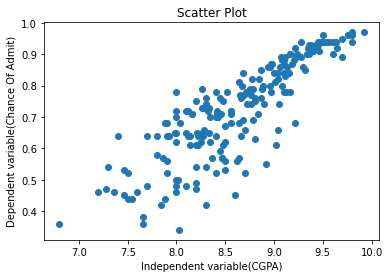

In [38]:
xsc = admission_data["CGPA"].tolist()
ysc = admission_data["Chance_of_Admit"].tolist()
show_scatter_plot('Scatter Plot', 'Dependent variable(Chance Of Admit)', 
                  'Independent variable(CGPA)', xsc, ysc )

<h3>Calculating the Regression line </h3>

In [39]:
import numpy as np

def calculate_slope_intercept(x_values, y_values):
    """
    Calculate the slope and intercept of a regression line.
    @param x_values the independent x values.
    @param y_values the dependent y values.
    @return a list of the slope and y-intercept of the line.
    """
    xsc = np.array(x_values)
    ysc = np.array(y_values)
    
    n = len(xsc)
    sum_x  = np.sum(xsc)
    sum_y  = np.sum(ysc)
    sum_xx = np.sum(xsc*xsc)
    sum_xy = np.sum(xsc*ysc)
    mean_x = np.mean(xsc)
    mean_y = np.mean(ysc)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = sum_xx - ((sum_x*sum_x)/n)
    
    m = numerator/denominator
    b = mean_y - m*mean_x
    
    return m, b  # slope and intercept

In [40]:
import matplotlib.pyplot as plt

def show_least_squares_line(title, x_label, y_label, 
                            x_values, y_values):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    # First show the scatter plot.
    plt.scatter(x_values, y_values)
    
    # Now show the least squares line.
    m, b = calculate_slope_intercept(x_values, y_values)
    reg_line = [m*x + b for x in x_values]  # regression line
    plt.plot(xsc, reg_line, color='red')

    plt.title(f'{title}, m = {m:.2f}, b = {b:.2f}')
    plt.ylabel(x_label)
    plt.xlabel(y_label)

    plt.show()

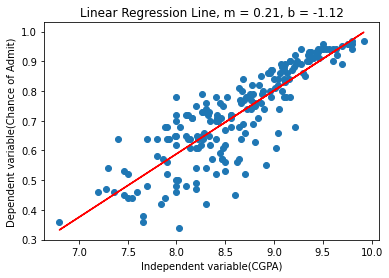

In [41]:
show_least_squares_line('Linear Regression Line', 'Dependent variable(Chance of Admit)', 
                  'Independent variable(CGPA)', xsc, ysc )

<h3>Calculating Coefficient of determination </h3>

In [42]:
ss_residual, ss_total = calculate_ss(xsc, ysc)

print(f'ss_residual = {ss_residual:8.5f}')
print(f'ss_total    = {ss_total:8.5f}')

ss_residual =  1.33146
ss_total    =  4.85188


In [43]:
r2 = calculate_r2(ss_residual, ss_total)

print(f'coefficient of determination = {r2:.3f}')

coefficient of determination = 0.726


<h3>Calculating Corelation Coefficient  </h3>

In [44]:
r = calculate_r(xsc, ysc)

print(f'r = {r:.3f}')
print("")

r = 0.852



## Report

### We tried to construct the regression line for two different parameters and see which one had a stronger corelation co-efficient(r) Gre Score and Chance of Admit had a r of  0.7 while the r for CGPA and Chance of Admit was 0.8. So we came to the conclusion that even though the value of r indicates a strong relationship between CGPA and Chance of Admit,there is an involvement of third elements like Toefl Score and GRE which are the reason why there is such a strong relationship between two. We used two different regressions here to show how the regression varies depending on the differnet dependednt variables. Here Chance of Admit wasnt solely due to the CGPA but due to GRE ,Toefl scores as well as CGPA.